In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from weather_key import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

efc3ec935ae1023cdffaef0b43d96d9d


In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

584

In [8]:
print("""Beginning Data Retrieval
         ---------------------------""")
curr_record = 1
curr_set = 1
city_data_json = []
for city in cities:
    print(f"Processing Record {curr_record} of Set {curr_set} | {city}")
    writer.writerow(city)
    res = requests.get(f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial')
    if res.status_code == 200:
        city_data_json.append(res.json())
    else:
        print("City not found. Skipping...")
    curr_record += 1
    if curr_record % 50 == 0:
        curr_set += 1
        curr_record = 1
        time.sleep(40) #I dont want to pay for this

Beginning Data Retrieval
         ---------------------------
Processing Record 1 of Set 1 | bilibino
Processing Record 2 of Set 1 | pakhtakoron
Processing Record 3 of Set 1 | pevek
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | bandarbeyla
Processing Record 8 of Set 1 | san jose
Processing Record 9 of Set 1 | bosaso
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | lasa
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | vao
Processing Record 14 of Set 1 | lavrentiya
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | arraial do cabo
Processing Record 18 of Set 1 | pisco
Processing Record 19 of Set 1 | padang
Processing Record 20 of Set 1 | saskylakh
Processing Record 21 of Set 1 | upernavik
Processing Record 22 of Set 1 | richards bay
Processing Record 23 of Set 1 | kidal
Processing 

Processing Record 40 of Set 4 | nishihara
Processing Record 41 of Set 4 | flin flon
Processing Record 42 of Set 4 | gold coast
Processing Record 43 of Set 4 | kingman
Processing Record 44 of Set 4 | port augusta
Processing Record 45 of Set 4 | ewa beach
Processing Record 46 of Set 4 | bulawayo
Processing Record 47 of Set 4 | buala
Processing Record 48 of Set 4 | constitucion
Processing Record 49 of Set 4 | benghazi
Processing Record 1 of Set 5 | shetpe
Processing Record 2 of Set 5 | ahuimanu
Processing Record 3 of Set 5 | yerbogachen
Processing Record 4 of Set 5 | panaba
Processing Record 5 of Set 5 | longyearbyen
Processing Record 6 of Set 5 | bethanien
Processing Record 7 of Set 5 | sorvag
City not found. Skipping...
Processing Record 8 of Set 5 | puerto leguizamo
Processing Record 9 of Set 5 | lakes entrance
Processing Record 10 of Set 5 | hofn
Processing Record 11 of Set 5 | the valley
Processing Record 12 of Set 5 | zhanatas
City not found. Skipping...
Processing Record 13 of Set 

Processing Record 37 of Set 8 | joetsu
Processing Record 38 of Set 8 | cheyenne
Processing Record 39 of Set 8 | alofi
Processing Record 40 of Set 8 | hervey bay
Processing Record 41 of Set 8 | labutta
City not found. Skipping...
Processing Record 42 of Set 8 | vyartsilya
Processing Record 43 of Set 8 | yinchuan
Processing Record 44 of Set 8 | jazzin
City not found. Skipping...
Processing Record 45 of Set 8 | tukrah
Processing Record 46 of Set 8 | viedma
Processing Record 47 of Set 8 | belyy yar
Processing Record 48 of Set 8 | oktyabrskoye
Processing Record 49 of Set 8 | sal rei
Processing Record 1 of Set 9 | yarmouth
Processing Record 2 of Set 9 | beeville
Processing Record 3 of Set 9 | bubaque
Processing Record 4 of Set 9 | mouila
Processing Record 5 of Set 9 | eldikan
City not found. Skipping...
Processing Record 6 of Set 9 | cayenne
Processing Record 7 of Set 9 | havoysund
Processing Record 8 of Set 9 | korablino
Processing Record 9 of Set 9 | siirt
Processing Record 10 of Set 9 | f

Processing Record 28 of Set 12 | buldana
Processing Record 29 of Set 12 | krasnoarmeyskoye
Processing Record 30 of Set 12 | tuy hoa
Processing Record 31 of Set 12 | puyang
Processing Record 32 of Set 12 | polunochnoye
Processing Record 33 of Set 12 | aberystwyth
Processing Record 34 of Set 12 | fort walton beach
Processing Record 35 of Set 12 | hamilton
Processing Record 36 of Set 12 | nushki
Processing Record 37 of Set 12 | college
Processing Record 38 of Set 12 | kiomboi
Processing Record 39 of Set 12 | nagykanizsa
Processing Record 40 of Set 12 | balakhta
Processing Record 41 of Set 12 | deniliquin
Processing Record 42 of Set 12 | santa cruz
Processing Record 43 of Set 12 | znamenskoye
Processing Record 44 of Set 12 | saint anthony
Processing Record 45 of Set 12 | bolgatanga


In [11]:
cleaned_city_data = []
for item in city_data_json:
    cleaned_item = {}
    cleaned_item['City'] = item['name']
    cleaned_item['Lat'] = item['coord']['lat']
    cleaned_item['Lng'] = item['coord']['lon']
    cleaned_item['Max Temp'] = item['main']['temp_max']
    cleaned_item['Humidity'] = item['main']['humidity']
    cleaned_item['Cloudiness'] = item['clouds']['all']
    cleaned_item['Wind Speed'] = item['wind']['speed']
    cleaned_item['Country'] = item['sys']['country']
    cleaned_item['Date'] = item['dt']
    cleaned_city_data.append(cleaned_item)
city_df = pd.DataFrame(cleaned_city_data)
city_df.to_csv(output_data_file)
display(city_df)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bilibino,68.0546,166.4372,21.99,77,99,12.64,RU,1618617430
1,Pakhtakoron,40.1571,68.7466,58.24,38,2,6.69,TJ,1618617430
2,Pevek,69.7008,170.3133,20.82,89,100,4.63,RU,1618617270
3,Tiksi,71.6872,128.8694,-0.29,99,100,8.41,RU,1618617431
4,Kapaa,22.0752,-159.3190,73.40,78,75,9.22,US,1618617292
...,...,...,...,...,...,...,...,...,...
758,Deniliquin,-35.5333,144.9667,59.00,51,0,4.00,AU,1618620419
759,Santa Cruz de la Sierra,-17.8000,-63.1667,74.41,75,0,5.44,BO,1618620304
760,Znamenskoye,57.1281,73.8282,26.42,67,100,2.93,RU,1618620420
761,Saint Anthony,45.0205,-93.2180,57.20,28,1,10.36,US,1618620421


In [14]:
# remove all cities where humidity is over 100%
cleaned_city_df = city_df[city_df['Humidity'] <= 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bilibino,68.0546,166.4372,21.99,77,99,12.64,RU,1618617430
1,Pakhtakoron,40.1571,68.7466,58.24,38,2,6.69,TJ,1618617430
2,Pevek,69.7008,170.3133,20.82,89,100,4.63,RU,1618617270
3,Tiksi,71.6872,128.8694,-0.29,99,100,8.41,RU,1618617431
4,Kapaa,22.0752,-159.3190,73.40,78,75,9.22,US,1618617292
...,...,...,...,...,...,...,...,...,...
758,Deniliquin,-35.5333,144.9667,59.00,51,0,4.00,AU,1618620419
759,Santa Cruz de la Sierra,-17.8000,-63.1667,74.41,75,0,5.44,BO,1618620304
760,Znamenskoye,57.1281,73.8282,26.42,67,100,2.93,RU,1618620420
761,Saint Anthony,45.0205,-93.2180,57.20,28,1,10.36,US,1618620421


<AxesSubplot:xlabel='Lat', ylabel='Max Temp'>

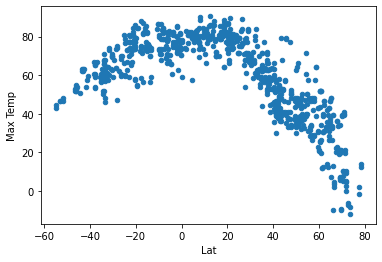

In [17]:
#Latitude vs. Temperature Plot
lt = cleaned_city_df.plot.scatter(x='Lat', 
                             y='Max Temp',
                             title="City Latitude vs. Max Temperature (04/15/20)"
                            )
lt.set_xlabel("Latitude")
lc.set_ylabel("Max T ()")

Text(0, 0.5, 'Humidity (%)')

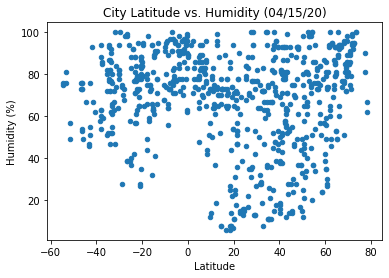

In [30]:
#Latitude vs. Humidity Plot
lh = cleaned_city_df.plot.scatter(x='Lat', 
                             y='Humidity',
                             title="City Latitude vs. Humidity (04/15/20)"
                            )
lh.set_xlabel("Latitude")
lh.set_ylabel("Humidity (%)")

Text(0, 0.5, 'Cloudiness (%)')

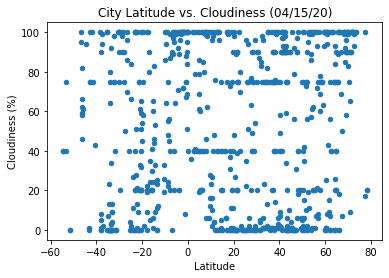

In [28]:
#Latitude vs. Cloudiness Plot
lc = cleaned_city_df.plot.scatter(x='Lat', 
                                  y='Cloudiness',
                                  title="City Latitude vs. Cloudiness (04/15/20)"
                                 )
lc.set_xlabel("Latitude")
lc.set_ylabel("Cloudiness (%)")

<AxesSubplot:title={'center':'City Latitude vs. Wind Speed (04/15/20)'}, xlabel='Latitude', ylabel='Wind Speed (mph)'>

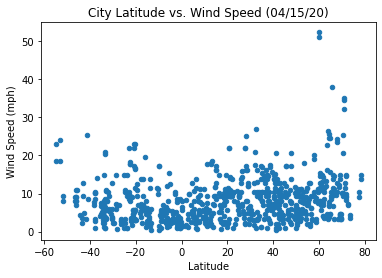

In [27]:
#Latitude vs. Wind Speed Plot
lw = cleaned_city_df.plot(kind='scatter',
                     x='Lat', 
                     y='Wind Speed', 
                     title="City Latitude vs. Wind Speed (04/15/20)",
                    )
lw.set_xlabel("Latitude")
lw.set_ylabel("Wind Speed (mph)")
display(lw)